<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/Collect_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook
import json
import csv
from datetime import date
from datetime import datetime
import time
import itertools 

In [19]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/twitter_analysis/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
consumer_key="5iwJ0kh5IkWudh2kXbbV0s5eM"
consumer_secret="DSZGordR8WpGbNJbxwEwMBvJ4E4RJRbemzLQ0vpVArAzSuoLqY"
access_token="799815406462652416-V4f33Mp2G81GeSLeWVHQgGtp2djIuyK"
access_token_secret="UH4iGaQhmNiKVeo2scTmgZneTQuRDR10SSoyivGS0qU0K"


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
#, wait_on_rate_limit=True, timeout = 5

#try again new code to avoid duplicate tweets

In [1]:
import tweepy

consumer_key="5iwJ0kh5IkWudh2kXbbV0s5eM"
consumer_secret="DSZGordR8WpGbNJbxwEwMBvJ4E4RJRbemzLQ0vpVArAzSuoLqY"


# Replace the API_KEY and API_SECRET with your application's key and secret.
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
!pip3 install jsonpickle

In [44]:
import sys
import jsonpickle
import os

searchQuery = 'fly_nas'  # this is what we're searching for
maxTweets = 1000 # Some arbitrary large number
tweetsPerQry = 100  # this is the max the API permits
fName = 'tweets_enen3_fly.csv' # We'll store the tweets in a text file.


# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None


places = []
time = []
tweets = []

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id = -1

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))

with open(path + fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry, lang = 'en')
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            since_id=sinceId, lang = 'en')
            else:
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            max_id=str(max_id - 1), lang = 'en')
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId, lang = 'en')
            if not new_tweets:
                
                print("No more tweets found")
                break
            for tweet in new_tweets:
                
                #add data to lists
                
                #1. creted at
                time.append((tweet.created_at.month,tweet.created_at.year))
                
                #location of user
                places.append(tweet.user.location)
                
                #text of tweet
                tweets.append(tweet.text)
                
                f.write(jsonpickle.encode(tweet.text, unpicklable=False) +'\n')
                
            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

Downloaded 44 tweets
No more tweets found
Downloaded 44 tweets, Saved to tweets_enen3_fly.csv


#Collect the datasets

In [46]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  new_tweets = api.user_timeline(screen_name = screen_name,count=200, lang = "en")
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left
  while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest, lang = "en")
    #just if lan tweetes 
    # save most recent tweets
    
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  outtweets = [[tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, screen_name] 
               for tweet in alltweets]
  # write the csv
  with open(path + '/%s_tweets.csv' % screen_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
    writer.writerows(outtweets)
  pass

In [47]:
get_all_tweets("Saudi_airlines")

getting tweets before 1335600468454727680
...400 tweets downloaded so far
getting tweets before 1334496574278414338
...600 tweets downloaded so far
getting tweets before 1333115517134049279
...800 tweets downloaded so far
getting tweets before 1331876459242270720
...1000 tweets downloaded so far
getting tweets before 1330526794559188992
...1200 tweets downloaded so far
getting tweets before 1329487489682255874
...1400 tweets downloaded so far
getting tweets before 1328419588627963909
...1600 tweets downloaded so far
getting tweets before 1327591078132846593
...1800 tweets downloaded so far
getting tweets before 1326224422190129159
...2000 tweets downloaded so far
getting tweets before 1325429787926597632
...2200 tweets downloaded so far
getting tweets before 1324200205777018879
...2400 tweets downloaded so far
getting tweets before 1323489661440954368
...2600 tweets downloaded so far
getting tweets before 1322723899075973120
...2800 tweets downloaded so far
getting tweets before 132202

In [45]:
get_all_tweets("flynas")

getting tweets before 1334850066801156096
...400 tweets downloaded so far
getting tweets before 1333156561330597889
...600 tweets downloaded so far
getting tweets before 1331215307248193536
...800 tweets downloaded so far
getting tweets before 1329369271940607999
...1000 tweets downloaded so far
getting tweets before 1327251135770599429
...1200 tweets downloaded so far
getting tweets before 1325649121156403199
...1400 tweets downloaded so far
getting tweets before 1323859462243966977
...1600 tweets downloaded so far
getting tweets before 1322264179290578945
...1800 tweets downloaded so far
getting tweets before 1320685303896723456
...2000 tweets downloaded so far
getting tweets before 1319247641604128768
...2200 tweets downloaded so far
getting tweets before 1317695904825167871
...2400 tweets downloaded so far
getting tweets before 1316309111512936448
...2600 tweets downloaded so far
getting tweets before 1314965630454566918
...2800 tweets downloaded so far
getting tweets before 131359

#try another hashtag for flynas

In [40]:
search_query="saudia_airlines"
new_tweets = tweepy.Cursor(api.user_timeline,q=search_query,count=200,lang="en",tweet_mode='extended').items(3000)

In [41]:
new_tweets

In [42]:
alltweets = []
alltweets.extend(new_tweets)

In [19]:

for tweet in new_tweets:
  all_tweets.append(tweet)


In [43]:
len(alltweets)

243

In [ ]:
# Helper function to handle twitter API rate limit
def limit_handled(cursor, list_name):
  while True:
    try:
      yield cursor.next()
    # Catch Twitter API rate limit exception and wait for 15 minutes
    except tweepy.RateLimitError:
      #print("\nData points in list = {}".format(len(list_name))))
      print('Hit Twitter API rate limit.')
      for i in range(3, 0, -1):
        print("Wait for {} mins.".format(i * 5))
        time.sleep(5 * 60)
    # Catch any other Twitter API exceptions
    except tweepy.error.TweepError:
      print('\nCaught TweepError exception' )

In [ ]:
limit_handled(new_tweets, saudia_care)

#try this

In [46]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets2(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  #Cursor(api.user_timeline).items():
  new_tweets = api.search(q=screen_name,count=200,lang="en",tweet_mode='extended')
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left


  while len(new_tweets) > 0:
    if len(alltweets) == 3000:
      break
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.search(q=screen_name,count=200,lang="en",tweet_mode='extended')
    #just if lan tweetes 
    # save most recent tweets
    
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  return alltweets

In [ ]:
all_tweets2 = get_all_tweets2('flynas')

In [49]:
len(all_tweets2)

3000

#yessss work

In [6]:
def get_all_tweets3(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  #Cursor(api.user_timeline).items():
  new_tweets = api.search(q=screen_name,count=200,lang="en",tweet_mode='extended')
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  return alltweets, oldest

In [7]:
tweets_fly, oldest = get_all_tweets3('flynas')

In [8]:
tweets_fly

[Status(_api=<tweepy.api.API object at 0x7f2d77012710>, _json={'created_at': 'Wed Dec 09 14:34:00 +0000 2020', 'id': 1336680499771703301, 'id_str': '1336680499771703301', 'full_text': '@Paddu61597643 @IndianEmbRiyadh @MIB_India @MoCA_GoI @HardeepSPuri @DrSJaishankar @DGCAIndia @PMOIndia @narendramodi @drausaf @saudiexpat @Saudi_Gazette @SaudiGulf_sa @Saudi_Airlines @Saudi @KingSalman @airindiain @flynas @KSAembassyIND @rashtrapatibhvn @bandisanjay_bjp Thank you madam your support.', 'truncated': False, 'display_text_range': [271, 300], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Paddu61597643', 'name': 'Paddu', 'id': 1072654787248906245, 'id_str': '1072654787248906245', 'indices': [0, 14]}, {'screen_name': 'IndianEmbRiyadh', 'name': 'India in Saudi Arabia', 'id': 3103312489, 'id_str': '3103312489', 'indices': [15, 31]}, {'screen_name': 'MIB_India', 'name': 'MIB India 🇮🇳 #StayHome #StaySafe', 'id': 920488039, 'id_str': '920488039', 'indices': [32, 42]}

In [9]:
len(tweets_fly)

100

In [8]:
tweets_saudia = get_all_tweets3('saudia_care')

In [9]:
tweets_saudia

[Status(_api=<tweepy.api.API object at 0x7f5a53d090b8>, _json={'created_at': 'Tue Dec 08 21:04:10 +0000 2020', 'id': 1336416300348923905, 'id_str': '1336416300348923905', 'full_text': '@Saudi_Airlines Not only me, My whole family love to travel with SAUDIA including me because we are always emotionally and strongly connected with SAUDIA, as it is like a part of our family. Crew members always try to serve as they care to you. Best Wishes SAUDIA. 🇸🇦🇸🇦🇸🇦🌴🌹🌹🌹', 'truncated': False, 'display_text_range': [16, 275], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Saudi_Airlines', 'name': 'السعودية | SAUDIA', 'id': 170620083, 'id_str': '170620083', 'indices': [0, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1336370014404882435, 'in_reply_to_status_id_str': '1336370014404882435', 'in_reply_to_user_id':

In [72]:
len(tweets_saudia)

NameError: ignored

#flynas

In [10]:
#oldest = tweets_fly[-1].id - 1
while len(tweets_fly) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.search(q='flynas',count=200,lang="en",tweet_mode='extended')
    #just if lan tweetes 
    # save most recent tweets
    
    tweets_fly.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = tweets_fly[-1].id - 1
    print("...%s tweets downloaded so far" % (len(tweets_fly)))
    
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  #return alltweets

getting tweets before 1333453795901247494
...200 tweets downloaded so far
getting tweets before 1333453795901247494
...300 tweets downloaded so far
getting tweets before 1333453795901247494
...400 tweets downloaded so far
getting tweets before 1333453795901247494
...500 tweets downloaded so far
getting tweets before 1333453795901247494
...600 tweets downloaded so far
getting tweets before 1333453795901247494
...700 tweets downloaded so far
getting tweets before 1333453795901247494
...800 tweets downloaded so far
getting tweets before 1333453795901247494
...900 tweets downloaded so far
getting tweets before 1333453795901247494
...1000 tweets downloaded so far
getting tweets before 1333453795901247494
...1100 tweets downloaded so far
getting tweets before 1333453795901247494
...1200 tweets downloaded so far
getting tweets before 1333453795901247494
...1300 tweets downloaded so far
getting tweets before 1333453795901247494
...1400 tweets downloaded so far
getting tweets before 13334537959

KeyboardInterrupt: ignored

#Saudia

In [11]:
oldest = tweets_saudia[-1].id - 1
while len(tweets_saudia) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.search(q='flynas',count=200,lang="en",tweet_mode='extended')
    #just if lan tweetes 
    # save most recent tweets
    
    tweets_saudia.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = tweets_saudia[-1].id - 1
    print("...%s tweets downloaded so far" % (len(tweets_saudia)))
    
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  #return alltweets

getting tweets before 1333360975974719487
...143 tweets downloaded so far
getting tweets before 1333401770937212928
...243 tweets downloaded so far
getting tweets before 1333401770937212928
...343 tweets downloaded so far
getting tweets before 1333401770937212928
...443 tweets downloaded so far
getting tweets before 1333401770937212928
...543 tweets downloaded so far
getting tweets before 1333401770937212928
...643 tweets downloaded so far
getting tweets before 1333401770937212928
...743 tweets downloaded so far
getting tweets before 1333401770937212928
...843 tweets downloaded so far
getting tweets before 1333401770937212928
...943 tweets downloaded so far
getting tweets before 1333401770937212928
...1043 tweets downloaded so far
getting tweets before 1333401770937212928
...1143 tweets downloaded so far
getting tweets before 1333401770937212928
...1243 tweets downloaded so far
getting tweets before 1333401770937212928
...1343 tweets downloaded so far
getting tweets before 133340177093

KeyboardInterrupt: ignored

In [12]:
len(tweets_fly)

8700

In [12]:
len(tweets_saudia)

7943

In [50]:
search_query_fly = 'flynas'

In [13]:
search_query_saudia = 'Saudia airlines'

In [51]:
outtweets = [[tweet.id_str, tweet.created_at,tweet.full_text , tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, search_query_fly] 
               for tweet in all_tweets2]
  # write the csv
with open(path + '/fly_tweets_again2.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
  writer.writerows(outtweets)
pass

In [12]:
all_tweets = get_all_tweets2('flynas')

In [ ]:
new_tweets

In [ ]:
len(saudia_airlines[saudia_airlines.language == "en"])

1464

In [ ]:
len(flynas_airlines[flynas_airlines.language == "en"])

219

#Read the data sets

In [60]:
saudia_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/Saudi_airlines_tweets_latest.csv")

In [61]:
saudia_airlines.shape

(3231, 8)

In [62]:
saudia_airlines.sample(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
1260,1329098116579135488,2020-11-18 16:24:19,"@kazi1255 Hello dear guest, You can follow up ...",0,False,Saudi Arabia,en,Saudi_airlines
1880,1325875999389720576,2020-11-09 19:00:46,@akh3060 ضيفنا العزيز، تم الرد عبر الخاص,0,False,Saudi Arabia,ar,Saudi_airlines
1961,1325498391061782530,2020-11-08 18:00:17,إضافة رحلات يومية بين #جدة و #القصيم\n\nاحجز ا...,128,False,Saudi Arabia,ar,Saudi_airlines
158,1335907824694661121,2020-12-07 11:23:40,@y3quby وعليكم السلام ورحمة الله وبركاته ضيفنا...,0,False,Saudi Arabia,ar,Saudi_airlines
395,1334500689444270082,2020-12-03 14:12:12,"@IsrarKh37531313 Hello dear valued Guest, to r...",0,False,Saudi Arabia,en,Saudi_airlines


In [63]:
flynas_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/flynas_tweets_latest.csv")

In [64]:
flynas_airlines.shape

(3240, 8)

In [65]:
flynas_airlines.sample(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
711,1330197213268627460,2020-11-21 17:11:44,مرام شغوفة بعملها، عملت معنا في طيران ناس لأكث...,38,False,Saudi Arabia,ar,flynas
1030,1327006045957402626,2020-11-12 21:51:10,@PTH1992 تم الرد من خلال الخاص,0,False,Saudi Arabia,ar,flynas
70,1336123954247905283,2020-12-08 01:42:29,@sheshagirirao99 We've replied to your private...,0,False,Saudi Arabia,en,flynas
898,1328383110413758466,2020-11-16 17:03:08,@mohsenfaisal201 حياك الله،تابعنا وسيتم الإعلا...,0,False,Saudi Arabia,ar,flynas
2699,1314304874297860116,2020-10-08 20:41:15,@rr34r5 مرحبا، يمكنك الإطلاع على الرحلات والحج...,2,False,Saudi Arabia,ar,flynas


#Filter English tweets

**Saudia Airlines**

In [66]:
saudia_airlines_en = saudia_airlines[saudia_airlines.language == "en"]

In [67]:
saudia_airlines_en.shape

(1373, 8)

In [68]:
saudia_airlines_en.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
5,1336728569272262663,2020-12-09 17:45:00,"@Shakeel60633858 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
7,1336719354537369603,2020-12-09 17:08:23,"@Zishanh31436141 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
9,1336711502087254018,2020-12-09 16:37:11,"@AnwarHu13119859 Hello dear valued guest, once...",0,False,Saudi Arabia,en,Saudi_airlines
14,1336705261340332032,2020-12-09 16:12:23,"@Emuyefetari Dear valued guest, kindly review ...",0,False,Saudi Arabia,en,Saudi_airlines
19,1336693042225483781,2020-12-09 15:23:50,"@KashmirLakha5 Dear guest, there is no flight ...",0,False,Saudi Arabia,en,Saudi_airlines


**Flynas**

In [69]:
flynas_airlines_en = flynas_airlines[flynas_airlines.language == "en"]

In [70]:
flynas_airlines_en.shape

(225, 8)

In [71]:
flynas_airlines_en.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
11,1336631281145294850,2020-12-09 11:18:25,"@lahoridhol hello, dear kindly cheek link belo...",0,False,Saudi Arabia,en,flynas
24,1336548014068994051,2020-12-09 05:47:33,"@jessica_uys Hello, kindly provide us with you...",0,False,Saudi Arabia,en,flynas
25,1336463232177934338,2020-12-09 00:10:39,"@saqibxtc Good morning dear , kindly provide u...",0,False,Saudi Arabia,en,flynas
45,1336310819198537740,2020-12-08 14:05:01,"@nandlal23173532 Dear, Follow us if available ...",0,False,Saudi Arabia,en,flynas
53,1336270489245921280,2020-12-08 11:24:45,@HusainA89126244 kindly delete the tweet becau...,0,False,Saudi Arabia,en,flynas


As we can see here there is **imbalance** in the number of tweets in Saudia Airlines and Flynas so we must consider this when apply **Machine Learning**

#Check the duplicated tweets and remove it 



**Saudia Airlines**

In [ ]:
saudia_airlines_en.drop_duplicates(subset='text', inplace= True)

In [73]:
saudia_airlines_en.shape

(1365, 8)

**Flynas**

In [ ]:
flynas_airlines_en.drop_duplicates(subset='text', inplace= True)

In [75]:
flynas_airlines_en.shape

(204, 8)

#Combine the data sets


In [82]:
frames = [saudia_airlines_en, flynas_airlines_en]

airline = pd.concat(frames)

In [85]:
airline.sample(10)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
1647,1327285872786624512,2020-11-13 16:23:06,"@VivekKu69393090 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
571,1333413865107968003,2020-11-30 14:13:33,"@JavedKh17191104 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
1859,1326000451062558720,2020-11-10 03:15:18,"@RajivKu30238551 Dear guest, there is no fligh...",0,False,Saudi Arabia,en,Saudi_airlines
25,1336463232177934338,2020-12-09 00:10:39,"@saqibxtc Good morning dear , kindly provide u...",0,False,Saudi Arabia,en,flynas
1864,1320331777953697792,2020-10-25 11:50:01,"@zahidza13519656 Hello dear, we have replied v...",0,False,Saudi Arabia,en,flynas
2200,1324199986112958465,2020-11-05 04:00:53,"@muduli2011 Dear guest, there is no flight fro...",0,False,Saudi Arabia,en,Saudi_airlines
1604,1322252713225314305,2020-10-30 19:03:07,"@JavedKh17191104 Hello , Follow us if availabl...",0,False,Saudi Arabia,en,flynas
1384,1328480087377907712,2020-11-16 23:28:29,"@TabrejK06687045 Dear guest, international fli...",0,False,Saudi Arabia,en,Saudi_airlines
2669,1322551270637527042,2020-10-31 14:49:29,"@Shamim81356779 Dear guest, there is no flight...",0,False,Saudi Arabia,en,Saudi_airlines
1530,1327989162541281281,2020-11-15 14:57:43,"@asep_pupung Welcome valued guest, Kindly foll...",1,False,Saudi Arabia,en,Saudi_airlines


#Cleaning the text

In [88]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub(r'\d', '', text)
 text = "".join([word.lower() for word in text if word not in string.punctuation])
 
 return text

In [89]:
# Clean the tweets
airline["text"] = airline["text"].apply(cleanTxt)

# Show the cleaned tweets
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
5,1336728569272262663,2020-12-09 17:45:00,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines
7,1336719354537369603,2020-12-09 17:08:23,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines
9,1336711502087254018,2020-12-09 16:37:11,hello dear valued guest once the confirmation...,0,False,Saudi Arabia,en,Saudi_airlines
14,1336705261340332032,2020-12-09 16:12:23,dear valued guest kindly review the travel gu...,0,False,Saudi Arabia,en,Saudi_airlines
19,1336693042225483781,2020-12-09 15:23:50,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines


#Tokanization

In [90]:
def tokenization(text):
    text = re.split('\W+', text)
    return text


In [95]:

airline['Tweet_tokenized'] = airline['text'].apply(lambda x: tokenization(x.lower()))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_stemmed
5,1336728569272262663,2020-12-09 17:45:00,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."
7,1336719354537369603,2020-12-09 17:08:23,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."
9,1336711502087254018,2020-12-09 16:37:11,hello dear valued guest once the confirmation...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, valued, guest, once, the, conf...","[, hello, dear, valu, guest, onc, the, confirm..."
14,1336705261340332032,2020-12-09 16:12:23,dear valued guest kindly review the travel gu...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, valued, guest, kindly, review, the, t...","[, dear, valu, guest, kindli, review, the, tra..."
19,1336693042225483781,2020-12-09 15:23:50,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."


#stemming

stemming is basically an algorithm to categorize similar words into one. 

In [92]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

In [94]:
airline['Tweet_stemmed'] = airline['Tweet_tokenized'].apply(lambda x: stemming(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_stemmed
5,1336728569272262663,2020-12-09 17:45:00,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."
7,1336719354537369603,2020-12-09 17:08:23,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."
9,1336711502087254018,2020-12-09 16:37:11,hello dear valued guest once the confirmation...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, valued, guest, once, the, conf...","[, hello, dear, valu, guest, onc, the, confirm..."
14,1336705261340332032,2020-12-09 16:12:23,dear valued guest kindly review the travel gu...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, valued, guest, kindly, review, the, t...","[, dear, valu, guest, kindli, review, the, tra..."
19,1336693042225483781,2020-12-09 15:23:50,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."


#Lemmatizing

According to wiki, Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech

In [96]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatize(text):
    text = [wn.lemmatize(word) for word in text]
    return text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
airline['Tweet_lemmatized'] = airline['Tweet_tokenized'].apply(lambda x: lemmatize(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_stemmed,Tweet_lemmatized
5,1336728569272262663,2020-12-09 17:45:00,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."
7,1336719354537369603,2020-12-09 17:08:23,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."
9,1336711502087254018,2020-12-09 16:37:11,hello dear valued guest once the confirmation...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, valued, guest, once, the, conf...","[, hello, dear, valu, guest, onc, the, confirm...","[, hello, dear, valued, guest, once, the, conf..."
14,1336705261340332032,2020-12-09 16:12:23,dear valued guest kindly review the travel gu...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, valued, guest, kindly, review, the, t...","[, dear, valu, guest, kindli, review, the, tra...","[, dear, valued, guest, kindly, review, the, t..."
19,1336693042225483781,2020-12-09 15:23:50,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i..."


In fact, it can be clearly seen that lemmatizing better than stemming since some the words transformed to meaningless words such as kindli instead of being kindly which is the correct form of the word 

Now let's compare the number of unique words in Lemmatizing and Stemming

In [99]:
listOfWordsLemma = list(itertools.chain.from_iterable(airline['Tweet_lemmatized']))
listOfWordsStem = list(itertools.chain.from_iterable(airline['Tweet_stemmed']))

#number of unique tokens
print("Unique words aft Lemm :"+str(len(set(listOfWordsLemma))))
print("Unique words aft Stem :"+str(len(set(listOfWordsStem))))

Unique words aft Lemm :578
Unique words aft Stem :528


Surprisingly the Stemmed version got a lesser number of words. Therefore I will have to move forward with ['Tweet_lemmatized'] data set.

#Remove stopwords

In [100]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [103]:
airline['Tweet_nonstop'] = airline['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
airline.head(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_stemmed,Tweet_lemmatized,Tweet_nonstop
5,1336728569272262663,2020-12-09 17:45:00,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, flight, india, saudi, arabia, ..."
7,1336719354537369603,2020-12-09 17:08:23,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, flight, india, saudi, arabia, ..."
9,1336711502087254018,2020-12-09 16:37:11,hello dear valued guest once the confirmation...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, valued, guest, once, the, conf...","[, hello, dear, valu, guest, onc, the, confirm...","[, hello, dear, valued, guest, once, the, conf...","[, hello, dear, valued, guest, confirmation, d..."
14,1336705261340332032,2020-12-09 16:12:23,dear valued guest kindly review the travel gu...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, valued, guest, kindly, review, the, t...","[, dear, valu, guest, kindli, review, the, tra...","[, dear, valued, guest, kindly, review, the, t...","[, dear, valued, guest, kindly, review, travel..."
19,1336693042225483781,2020-12-09 15:23:50,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, there, is, no, flight, from, i...","[, dear, guest, flight, india, saudi, arabia, ..."


Now, let's check the number of unique words has reduced or not. Ideally, there has to be some reduction. 

In [104]:
listOfWordsNonstop = list(itertools.chain.from_iterable(airline['Tweet_nonstop']))

#number of unique tokens in first data set
print("Unique words aft removing stop words :"+str(len(set(listOfWordsNonstop))))

Unique words aft removing stop words :509


#Convert tokens into string

In [105]:
def join_tokens(tokens):
  document = " ".join([word for word in tokens if not word.isdigit()])
  return document

In [106]:
airline['nonstop_documents'] = airline['Tweet_nonstop'].apply(lambda x: join_tokens(x))

#Removing words with fewer frequencies

#Word cloud visualization

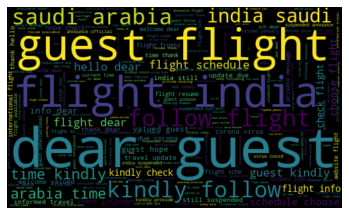

In [107]:
allWords = ''.join([str(twts) for twts in airline['nonstop_documents']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Removing columns because we need only the last process from cleaning the data

In [108]:
airline = airline.drop(['Tweet_tokenized', 'Tweet_lemmatized', 'Tweet_stemmed', 'Tweet_nonstop'], axis=1)

In [109]:
airline.sample(5)

,tweet_id,created_at,text,likes,retweeted,location,language,airline,nonstop_documents
2444,1315992753843720194,2020-10-13 12:28:17,we have replied via the dm and we hope to del...,0,False,Saudi Arabia,en,flynas,replied via dm hope delete tweet since contai...
601,1331204603237502976,2020-11-24 11:54:44,hello dear provide us with your booking numbe...,0,False,Saudi Arabia,en,flynas,hello dear provide u booking number private m...
1909,1325815318502117377,2020-11-09 14:59:39,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...
2515,1322951572792463362,2020-11-01 17:20:08,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...
1437,1328348163107926016,2020-11-16 14:44:16,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...


#Save the data set

In [110]:
airline.to_csv('airline.csv')
!cp airline.csv "./gdrive/My Drive/datasets/twitter_analysis/"